In [1]:
#Importing impotant libraries
import numpy as np
import pandas as pd

In [2]:
#Importing our data
df=pd.read_csv('mail_data.csv')

In [3]:
#Checking our intial data
df.sample(5)

,Category,Message,Unnamed 1,Unnamed 2,Unnamed 3
3674,ham,Moji just informed me that you saved our lives...,NaN,NaN,NaN
4049,ham,Lol or I could just starve and lose a pound by...,NaN,NaN,NaN
4182,ham,"Ok da, i already planned. I wil pick you.",NaN,NaN,NaN
462,ham,Great. Never been better. Each day gives even ...,NaN,NaN,NaN
4185,ham,I just really need shit before tomorrow and I ...,NaN,NaN,NaN


In [4]:
#More info on our data
df.shape

(5572, 5)

## Steps used in this project-




In [5]:
# 1.Data Cleaning-> Clearing the NaN values.

# 2.Exploratory Data Analysis(EDA)-> Analysing our given data.

# 3.Text Preprocessing-> Vectorizations, revoming stop verse.

# 4.Model Building-> Building our model, testing our model, applying our model.

# 5.Evaluation-> Evaluating our given data.

# 6.Improvements-> Depending on the evaluation improving data at the required places.

# 7.Website-> Showing our work in a website.

# 8.Deploy-> Deploying our website in Heroku app.


## 1. Data Cleaning

In [6]:
#More info on our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Category   5572 non-null   object 
 1   Message    5572 non-null   object 
 2   Unnamed 1  0 non-null      float64
 3   Unnamed 2  0 non-null      float64
 4   Unnamed 3  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 217.8+ KB


In [7]:
#Now deopping the last 3 columns as they are having null values
df.drop(columns=['Unnamed 1','Unnamed 2','Unnamed 3'],inplace=True)

In [8]:
#Checking after removing the last 3 unwanted columns
df.sample(5)

,Category,Message
1491,ham,Cant believe i said so many things to you this...
3245,ham,Squeeeeeze!! This is christmas hug.. If u lik ...
1046,ham,"Come round, it's ."
2051,ham,Hi where you. You in home or calicut?
113,ham,I'm ok wif it cos i like 2 try new things. But...


In [9]:
#Renaming the columns
df.rename(columns={'Category':'target','Message':'text'},inplace=True)

In [10]:
#Checking the sample after change
df.sample(5)

,target,text
5229,ham,It means u could not keep ur words.
2497,ham,HCL chennai requires FRESHERS for voice proces...
3581,ham,Have a lovely night and when you wake up to se...
5275,ham,Oh yeah clearly it's my fault
1535,ham,Remember on that day..


In [11]:
#Changing values in target(from spam to 1 and ham to 0)
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [12]:
#changing it in our main dataset
df['target']=encoder.fit_transform(df['target'])

In [13]:
#Checking it after the change
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#Now checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#Checking for duplicate values
df.duplicated().sum()

415

In [16]:
#Removing duplicate values
df=df.drop_duplicates(keep='first')

In [17]:
#Now checking if we have successfully removed duplicate value or not
df.duplicated().sum()

0

In [18]:
#With that we finish our step 1 of data cleaning,here is our final data shape
df.shape

(5157, 2)

## 2. Exploratory Data Analysis (EDA)


In [19]:
#Checking our data again
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
#Checking for percentage of messeges we have under spam and ham
df['target'].value_counts()

0    4516
1     641
Name: target, dtype: int64

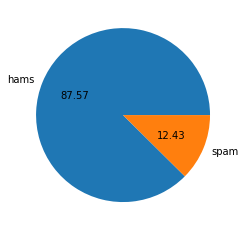

In [21]:
#Representing our precentage of data in spam and ham in a pie chart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['hams','spam'], autopct="%0.2f")
plt.show()

In [22]:
#Our data is imbalenced 88% of our data are hams and 12% are spams

In [23]:
#Importing a package that would help us in counting the number of characters in a sms,number of words in the sms
#and number of sentences in an sms 
import nltk

In [24]:
#Installing the file
#pip install nltk

In [25]:
#Downloading some extra packages
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\baibh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
#This is giving us the length of each sms
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: text, Length: 5157, dtype: int64

In [27]:
#Now puting the above information in a new column
df['num_characters']=df['text'].apply(len)

In [28]:
#Showing our dataset after adding the column
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
#This is giving us the number of words in an sms
#Breaking each word and putting it in a list
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5157, dtype: object

In [30]:
#Now counting the length of each word 
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5157, dtype: int64

In [31]:
#Now puting the above information in a new column
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
#Showing our dataset after adding the column
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [33]:
#Now on the basis of sentences breaking our sentences
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568               [Will ü b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5157, dtype: object

In [34]:
#Now counting the length of each sentences
df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5157, dtype: int64

In [35]:
#Now puting the above information in a new column
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [36]:
#Showing our dataset after adding the column
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [37]:
#Now gathering more information about our new added columns
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560016,1.965290
std,58.382922,13.403671,1.439549
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
#Now describing the columns of our ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267272,1.822852
std,56.708301,13.585433,1.374848
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
#Now describing the columns of our spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.968799
std,30.399707,7.103501,1.486069
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

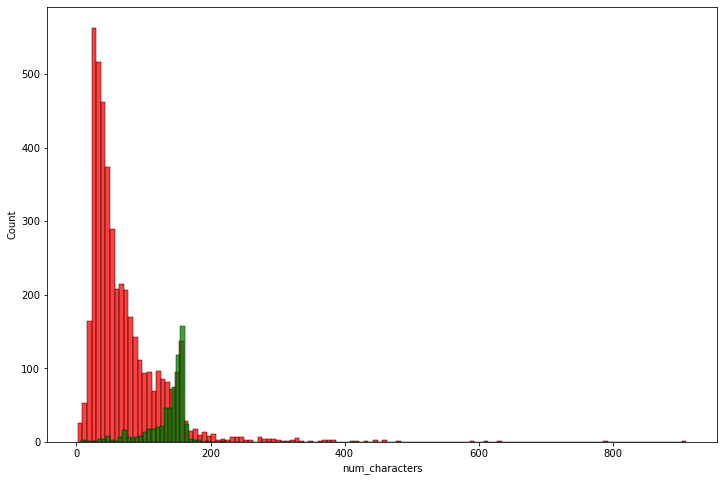

In [40]:
#Plotting histograms for our ham(green) and spam(red) messages(number of characters)
#We can clearly see that the length of or our spam messages are higher
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'],color='red')
sns.histplot(df[df['target']==1]['num_characters'],color='green')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

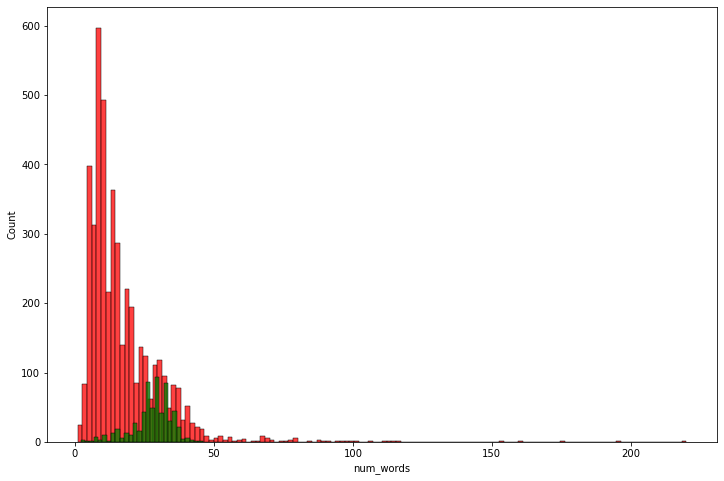

In [41]:
#Plotting histograms for our ham(green) and spam(red) messages(number of words)
#We can clearly see that the length of or our spam messages are higher
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'],color='red')
sns.histplot(df[df['target']==1]['num_words'],color='green')

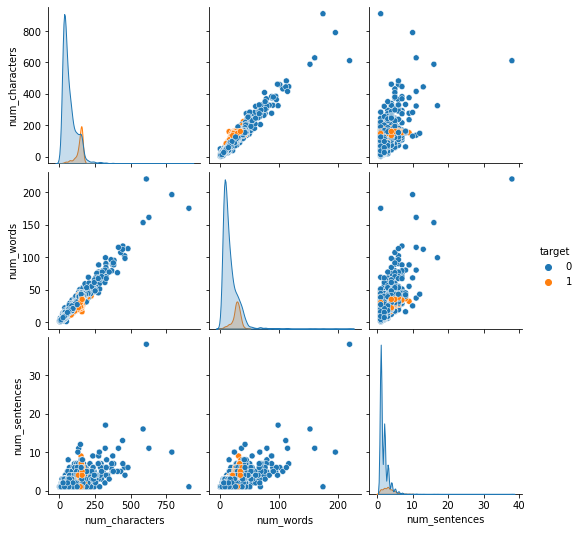

In [42]:
#Now we are to find the relationship between the number of words and number of sentences
sns.pairplot(df,hue='target')

In [43]:
#Now er are trying to find out the correlations 
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.374409,0.256023,0.262657
num_characters,0.374409,1.000000,0.966179,0.624267
num_words,0.256023,0.966179,1.000000,0.680217
num_sentences,0.262657,0.624267,0.680217,1.000000


<AxesSubplot:>

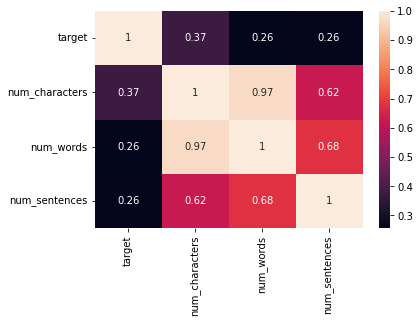

In [44]:
#Putting the corelations in an heatmap
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing 
#### (i) Lowercase
#### (ii) Tokenization
#### (iii) Removing special characters
#### (iv) Removing stop words and punctuations
#### (v) Stemming

In [45]:
#Creating a new function that will tramsform  all the alphabets into lower class
def transform_text(text):
    text=text.lower()
    return text

In [46]:
#Tacking an example
transform_text('Hi, how are you?')

'hi, how are you?'

In [47]:
#Creating a new function that will tramsform  all the alphabets into lower class and tokenize
def transform_text(text):
    text=text.lower()
    text= nltk.word_tokenize(text)
    return text

In [48]:
#Tacking an example
transform_text('Hi, how are you %%%% ?')

['hi', ',', 'how', 'are', 'you', '%', '%', '%', '%', '?']

In [49]:
#Creating a new function that will tramsform  all the alphabets into lower class, tokenize and removing special characters
def transform_text(text):
    text=text.lower()
    text= nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    return y

In [50]:
#Tacking an example
transform_text('Hi, how are you?')

['hi', 'how', 'are', 'you']

In [51]:
#Downloading some extra packages
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\baibh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
#stopwords are words which don't add meaning to a sentence they are only used in formation of sentences
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [53]:
#Now we are trying to find out the puntuation marks
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
#Creating a new function that will tramsform  all the alphabets into lower class, tokenize, removing special characters
#Removing stop words and punctuations
def transform_text(text):
    text=text.lower()
    text= nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if(i not in stopwords.words('english') and i not in string.punctuation):
            y.append(i)
    return y

In [55]:
#Tacking an example
transform_text('Hi, how are you?, Baibhav')

['hi', 'baibhav']

In [56]:
#This operator brings words in the word's root form 
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("Loving")

'love'

In [57]:
#Creating a new function that will tramsform  all the alphabets into lower class, tokenize, removing special characters
#Removing stop words and punctuations
def transform_text(text):
    text=text.lower()
    text= nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if(i not in stopwords.words('english') and i not in string.punctuation):
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [58]:
#Taking an example
transform_text('Fc Barcelona and Real Madrid is still the greatest rivalry in the footballing sence')

'fc barcelona real madrid still greatest rivalri footbal senc'

In [59]:
#applying our function in ourtext column

df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                              ü b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5157, dtype: object

In [60]:
#adding it to a new column
df['transformed_text']=df['text'].apply(transform_text)

In [61]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [62]:
#installing the wordcloud Package
#conda install -c conda-forge wordcloud

In [63]:
#importing our wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [64]:
#Putting our wordcloud package in spam_wc
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

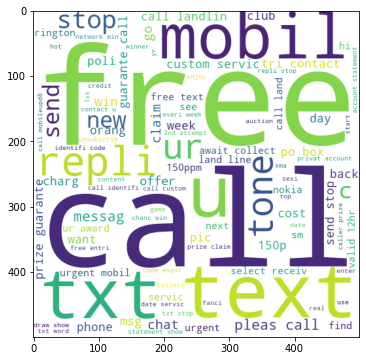

In [65]:
#This figure shows those words which are commly used in spam messages
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [66]:
#Putting our wordcloud package in ham_wc
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

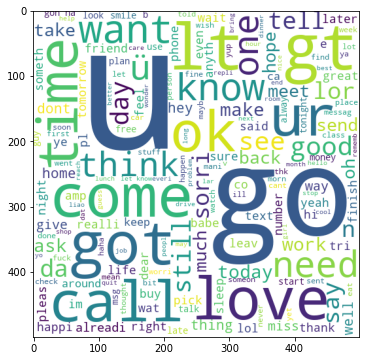

In [67]:
#This figure shows those words which are commly used in ham messages
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [68]:
#Now our data set
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [69]:
#Now we will try to print top 30 the most commonly used words in spam messages 
#We will first take all the rows showing spam messages,then focus on the colum transformed_text, then put it on a list, 
#now we will try to catch each word by using splitting the space we will put our woerds in spam_corpus
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [70]:
#Now here is our spam_corpous
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [71]:
#Here is the length of our spam corpous
len(spam_corpus)

9781

In [72]:
#Now we will catch its top 30 words
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 311),
 ('free', 186),
 ('2', 154),
 ('txt', 139),
 ('text', 122),
 ('ur', 119),
 ('u', 115),
 ('mobil', 110),
 ('stop', 108),
 ('repli', 103),
 ('claim', 96),
 ('4', 95),
 ('prize', 78),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('send', 60),
 ('tone', 59),
 ('urgent', 56),
 ('award', 55),
 ('nokia', 54),
 ('contact', 53),
 ('phone', 52),
 ('cash', 50),
 ('pleas', 50),
 ('week', 48),
 ('win', 46),
 ('min', 45),
 ('c', 43),
 ('guarante', 42)]

C:\Users\baibh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


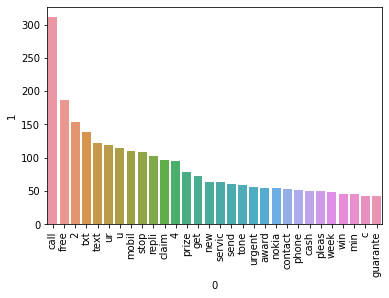

In [73]:
#Showing it in a chart form
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [74]:
#Now we will try to print top 30 the most commonly used words in ham messages 
#We will first take all the rows showing ham messages,then focus on the colum transformed_text, then put it on a list, 
#now we will try to catch each word by using splitting the space we will put our woerds in ham_corpus
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [75]:
#Here is the length of our ham corpous
len(ham_corpus)

35938

In [76]:
#Now we will catch its top 30 words
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 897),
 ('go', 407),
 ('get', 351),
 ('2', 288),
 ('gt', 288),
 ('lt', 287),
 ('come', 278),
 ('got', 239),
 ('know', 237),
 ('like', 236),
 ('call', 235),
 ('love', 222),
 ('time', 220),
 ('ok', 216),
 ('good', 215),
 ('want', 209),
 ('ur', 203),
 ('day', 195),
 ('ü', 173),
 ('need', 171),
 ('one', 166),
 ('4', 162),
 ('lor', 159),
 ('home', 152),
 ('think', 150),
 ('see', 148),
 ('take', 144),
 ('still', 144),
 ('da', 142),
 ('tell', 133)]

C:\Users\baibh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


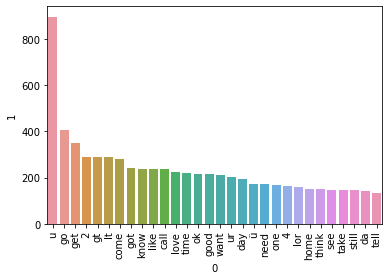

In [77]:
#Showing it in a chart form
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [78]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [79]:
#Now to solve our problems we will try and build a machine learning model
#We do it based on Naïve Bayes Algorithm because it is said that this algo works better for textual data
#Now our target is in numerical  form but our transformed text is not in numerical form we will first try to convert it into 
#a numerical form by vectorizing
#Here we will do it by bag of words
#First we will vectorize our data
#Then we will add it in Naïve Bayes
#Then we will check its accuracy and performance

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [80]:
#Converting the array from sparse array to dense array
#An array is dense if there are items at each index starting 0 until array.length-1. 
#Otherwise, if at least one item is missing at any index, the array is sparse.
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [81]:
#Here is the shape of X
X.shape

(5157, 3000)

In [82]:
#Now extracting y
y=df['target'].values

In [83]:
#Here is the shape of X
y

array([0, 0, 1, ..., 0, 0, 0])

In [84]:
#Now we will test our model
from sklearn.model_selection import train_test_split

In [85]:
#Using test train split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [86]:
#Now running our algorithm
#Importing the different nive bayes
#Importing accuracy_scores, confusion_matrix, precision_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [87]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [88]:
#Making object of each one of them
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672480620155039
[[785 120]
 [ 17 110]]
0.4782608695652174


In [89]:
#Training and printing mnb nive bayes
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709302325581395
[[905   0]
 [ 30  97]]
1.0


In [90]:
#Training and printing bnb nive bayes
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835271317829457
[[903   2]
 [ 15 112]]
0.9824561403508771


In [91]:
#After analysing all the data we finally choose tfidf and mnb
#tfidf ---> mnb

In [92]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


## 5. Evaluationg of data

In [93]:
#importing different types of machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [94]:
#Making objects for each algorithms
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [95]:
#Then we make a dictionary where our values are the name of the algorithm and values are the object
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [96]:
#Now we are making a function where we are giving our trainning and testing data and returning the accuracy and precision
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [97]:
#Now taking an example and using svc(support vector classification) and passing it to the above function
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9757751937984496, 0.9811320754716981)

In [98]:
#Now we are running a loop on our dictionary where we train every model and compare its precision and accuracy
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9757751937984496
Precision -  0.9811320754716981
For  KN
Accuracy -  0.9127906976744186
Precision -  1.0
For  NB
Accuracy -  0.9709302325581395
Precision -  1.0
For  DT
Accuracy -  0.936046511627907
Precision -  0.8210526315789474
For  LR
Accuracy -  0.9583333333333334
Precision -  0.9375
For  RF
Accuracy -  0.9718992248062015
Precision -  1.0
For  AdaBoost
Accuracy -  0.9660852713178295
Precision -  0.9423076923076923
For  BgC
Accuracy -  0.9612403100775194
Precision -  0.8918918918918919
For  ETC
Accuracy -  0.9786821705426356
Precision -  0.9906542056074766
For  GBDT
Accuracy -  0.9554263565891473
Precision -  0.9764705882352941


C:\Users\baibh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:25:41] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  xgb
Accuracy -  0.9689922480620154
Precision -  0.9611650485436893


In [99]:
#Now adding the above information in a data frame
#Then sorting it on the basis of best Precision
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [100]:
#Now here is our data frame
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912791,1.000000
2,NB,0.970930,1.000000
5,RF,0.971899,1.000000
8,ETC,0.978682,0.990654
0,SVC,0.975775,0.981132
9,GBDT,0.955426,0.976471
10,xgb,0.968992,0.961165
6,AdaBoost,0.966085,0.942308
4,LR,0.958333,0.937500
7,BgC,0.961240,0.891892


In [101]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [102]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.912791
1,NB,Accuracy,0.970930
2,RF,Accuracy,0.971899
3,ETC,Accuracy,0.978682
4,SVC,Accuracy,0.975775
5,GBDT,Accuracy,0.955426
6,xgb,Accuracy,0.968992
7,AdaBoost,Accuracy,0.966085
8,LR,Accuracy,0.958333
9,BgC,Accuracy,0.961240


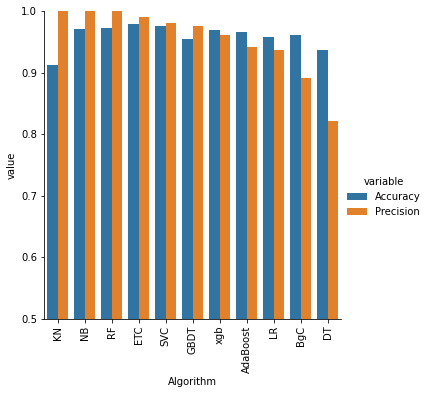

In [103]:
#Now making a bar representation of the above information
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()


## 6. Improving our model


In [104]:
# 1. Change the max_features parameter of TfIdf we put a max=3000


In [105]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [106]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [107]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [108]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [109]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [110]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000
1,NB,0.970930,1.000000,0.970930,1.000000,0.970930,1.000000,0.970930,1.000000
2,RF,0.971899,1.000000,0.971899,1.000000,0.971899,1.000000,0.971899,1.000000
3,ETC,0.978682,0.990654,0.978682,0.990654,0.978682,0.990654,0.978682,0.990654
4,SVC,0.975775,0.981132,0.975775,0.981132,0.975775,0.981132,0.975775,0.981132
5,GBDT,0.955426,0.976471,0.955426,0.976471,0.955426,0.976471,0.955426,0.976471
6,xgb,0.968992,0.961165,0.968992,0.961165,0.968992,0.961165,0.968992,0.961165
7,AdaBoost,0.966085,0.942308,0.966085,0.942308,0.966085,0.942308,0.966085,0.942308
8,LR,0.958333,0.937500,0.958333,0.937500,0.958333,0.937500,0.958333,0.937500
9,BgC,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892


In [111]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [112]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [113]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [114]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9815891472868217
Precision 1.0


In [115]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [116]:
from sklearn.ensemble import StackingClassifier

In [117]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [118]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9815891472868217
Precision 0.9736842105263158


In [119]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))